# Estimating Salary of Major League Baseball Players

## Phase 1

### Charlie Lock

## Contents:
- Introduction
- Data set Source
- Data set Details
- Dataset Features
- Target Feature
- Goals and Objectives
- Data cleaning and Preprocessing
- Data exploration and Visualisation
- Summary and Conclusion
- References



In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) 


## Introduction:

### Data set Source:
This data set is from the Baseball Salaries data set from Knowledge Extraction based on Evolutionary Learning (KEEL).


### Data set Details:
The data set that will be used in the following report involves the salary of 337 random Major League Baseball (MLB) players. In addition to the salary of each individual player the data set also provides certain significant variables/statistics for each player such as their batting average, on-base percentage, total number of runs, runs batted in (RBIs), home runs and hits as well as whether that player is eligible for free agency and/or arbitration. Other features given are the total number of doubles, triples, walks, strike-outs and errors. The data set does not include pitchers as a large portion of their value comes from their pitching and would make for a much more difficult analysis.

A reasonably reliable regression model relating to the salary of a player should be able to be created using an in depth analysis of a various number of these aforementioned variables.

Before data cleaning, this data set has 16 features and 337 observations in total.

In [4]:
df = pd.read_csv("baseballsalaries.csv")

df.head(10)

,Batting_average,On-base_percentage,Runs,Hits,Doubles,Triples,HomeRuns,Runs_batted_in,Walks,Strike-Outs,Stolen_bases,Errors,Free_agency_eligibility,Free_agent,Arbitration_eligibility,Arbitration,Salary
0,0.271,0.328,74,161,22,6,12,58,49,133,23,17,1,1,0,0,109
1,0.264,0.318,24,48,7,0,1,22,15,18,0,7,0,0,0,0,160
2,0.251,0.338,101,141,35,3,32,105,71,104,34,6,0,0,1,0,2700
3,0.224,0.274,28,94,21,1,1,44,27,54,2,7,1,1,0,0,550
4,0.206,0.262,14,51,18,1,1,28,17,26,0,3,1,1,0,0,300
5,0.238,0.272,53,106,18,3,15,59,22,107,14,7,0,0,0,0,230
6,0.115,0.148,0,3,1,0,0,2,1,6,0,3,0,0,0,0,109
7,0.307,0.405,98,167,35,1,14,52,84,72,0,15,0,0,0,0,560
8,0.187,0.281,38,50,9,2,15,37,32,98,0,9,0,0,0,0,142
9,0.266,0.359,115,152,32,1,44,122,78,152,26,9,1,0,0,0,4300


### Dataset Features:

In [5]:
from tabulate import tabulate

colnames = ["Feature", "Data Type", "Unit", "Description"]

table = [['Batting_average', 'Numeric', 'NA', 'The frequency at which a player successfully hits the ball \
          \nand moves off base from that hit'],
        ['On-base-percentage', 'Numeric', 'NA', 'The frequency at which a player successfully gets on base'],
        ['Runs', 'Numeric', 'NA', 'Total number of runs scored'],
        ['Hits', 'Numeric', 'NA', 'Total number of hits'],
        ['Doubles', 'Numeric', 'NA', 'Total number of doubles (a hit that results in an immediate\
        \nrun to second base)'],
        ['Triples', 'Numeric', 'NA', 'Total number of triples (a hit that results in an immediate\
        \nrun to third base)'],
        ['HomeRuns', 'Numeric', 'NA', 'Total number of home runs'],
        ['Runs_batted_in', 'Numeric', 'NA', 'An action (hit, walk, etc.) that results in a run being scored\
        \nby any player (including themselves)'],
        ['Walks', 'Numeric', 'NA', 'Total number of walks (when a player walks to first base after\
        \nfacing 4 balls or being struck by the pitcher)'],
        ['Strike-Outs', 'Numeric', 'NA', 'Total number of times a player strikes out'],
        ['Stolen_bases', 'Numeric', 'NA', 'Total number of stolen bases. A stolen base is when a player\
        \nwho is already on base runs to another base without the help of a\
        \n teammate hitting the ball'],
        ['Errors', 'Numeric', 'NA', 'An error is a mistake by a fielder that results in an opposition\
        \nplayer advancing to a base that they would not have if the mistake\
        \nhad not occured'],
        ['Free_agency_eligibility', 'Categorical', 'NA', 'A player who is eligible to become a free agent'],
        ['Free_agent', 'Categorical', 'NA', 'A player who elects to become a free agent is a player who is\
        \nfree to sign at any club if an agreement can be made'],
        ['Arbitration_elibility', 'Categorical', 'NA', 'Players with between 3 to 6 years of time in the MLB'],
        ['Arbitration', 'Categorical', 'NA', 'Players who are eligible for arbitration that cannot meet an\
        \nan agreement with their current team over a salary.\
        \nThe dispute is settled over a hearing where the player\
        \nreceives the salary proposed by themselves or their team.'],
        ['Salary', 'Numeric', 'USD', 'The annual salary (divided by 1000) of a player']]

print(tabulate(table, headers = colnames, tablefmt = 'grid'))

+-------------------------+-------------+--------+----------------------------------------------------------------------------+
| Feature                 | Data Type   | Unit   | Description                                                                |
+=========================+=============+========+============================================================================+
| Batting_average         | Numeric     | NA     | The frequency at which a player successfully hits the ball                 |
|                         |             |        | and moves off base from that hit                                           |
+-------------------------+-------------+--------+----------------------------------------------------------------------------+
| On-base-percentage      | Numeric     | NA     | The frequency at which a player successfully gets on base                  |
+-------------------------+-------------+--------+------------------------------------------------------

### Target Feature:
##### Target: The fair salary for any given player based off a certain number of the explanatory variables. The target feature will be a numeric variable in the form of a calculated amount of USD per year.

## Goals and Objectives:
MLB franchises are on limited budgets (some much more less so than others) so it is extensively important to pay players no more than what they are worth. The worth of a player being the significance of their contribution to a team winning games of baseball over a season. The difficulty in this is pinpointing the most important factors involved in a player's true worth. 

The acknowledgement of the significance of statistics in baseball has come a long way since the establishment of baseball as a professional sport well over 150 years ago. This steady improvement was thrown into the spotlight during the 2002 MLB season when the general manager of the Oakland Athletics, Billy Beane threw caution to the wind and abandoned the usual guidelines of list management by ignoring subjective opinions and used a model based largely off a few statistics to create a team he believed was capable of performing at a high level. Beane signed a number of players that were at the time projected to fail but in spite of the limited budget that the Oakland Athletics had the team went on to outperform all expectations and have a great season and as previously stated, highlighted the importance of data in the sport of baseball.  

In summary, the 2002 Oakland Athletics proved that a model reliably outputting the value of a player would be a significant aid to a franchise when considering a contract proposal to any given player and could be the difference between winning plenty of games or losing plenty of them. This model could also help teams predict how much a player is being offered by other teams around the league. Furthermore, the potential ability of this model to project whether a current player is producing as much as their contract suggests they should be producing could lead to the franchise considering a trade for that player and on the opposite side of this would be the franchise potentially finding undervalued players at other teams that they could attempt to pursue. 

Another potential use of finding a dependable model is for player agents who are looking to prove the player they respresent is worth more than they are potentially being offered. Of course, this would rely on the model being widely credited around the league but certain circumstances could certainly lead to it being a useful tool for player agents.  

Overall, this leads into my main goals of this project. The first major objective is to create a model that can predict how much a player is be being paid based off their performance. The second major objective is to figure out which statistics most significantly contribute to a player's salary.

## Data Cleaning and Preprocessing:

In [6]:
df.isna().sum()

Batting_average             0
 On-base_percentage         0
 Runs                       0
 Hits                       0
 Doubles                    0
 Triples                    0
 HomeRuns                   0
 Runs_batted_in             0
 Walks                      0
 Strike-Outs                0
 Stolen_bases               0
 Errors                     0
 Free_agency_eligibility    0
 Free_agent                 0
 Arbitration_eligibility    0
 Arbitration                0
Salary                      0
dtype: int64

There are zero features with missing values which means I do not have to drop or replace the rows from the data set and the entire data set can be used. 

In [7]:
df.drop([' Doubles', ' Triples', ' Free_agency_eligibility', ' Arbitration_eligibility'], axis=1)

,Batting_average,On-base_percentage,Runs,Hits,HomeRuns,Runs_batted_in,Walks,Strike-Outs,Stolen_bases,Errors,Free_agent,Arbitration,Salary
0,0.271,0.328,74,161,12,58,49,133,23,17,1,0,109
1,0.264,0.318,24,48,1,22,15,18,0,7,0,0,160
2,0.251,0.338,101,141,32,105,71,104,34,6,0,0,2700
3,0.224,0.274,28,94,1,44,27,54,2,7,1,0,550
4,0.206,0.262,14,51,1,28,17,26,0,3,1,0,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0.269,0.303,32,58,13,33,11,51,1,2,0,0,140
333,0.288,0.366,24,47,7,24,18,23,2,3,0,0,525
334,0.208,0.265,12,35,0,15,14,30,2,6,0,0,365
335,0.290,0.349,59,141,16,64,42,102,14,6,0,0,990


# Data Exploration and Visualisation:


## One-Variable Visualisation:

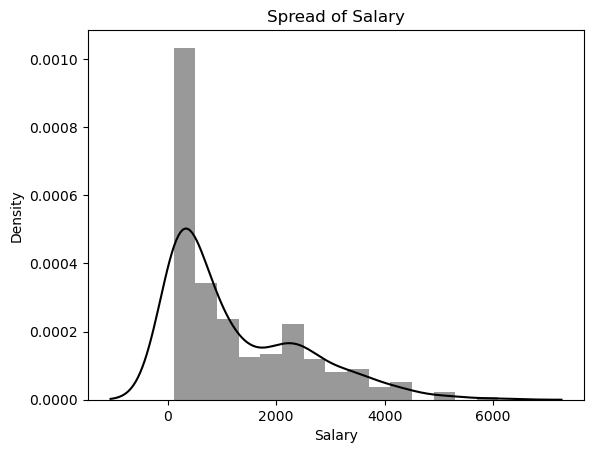

In [8]:
sns.distplot(df['Salary'], 
             color = 'black',
             bins = 15)
plt.title('Spread of Salary')
plt.xlabel("Salary")
plt.show()

The histogram of yearly salary across the league clearly suggests a high density of players with a wage around the minimum MLB wage. Outside of the players in this group, a gradual decrease in density can be seen as the salary increases to a maximum of around 6.1 million USD.

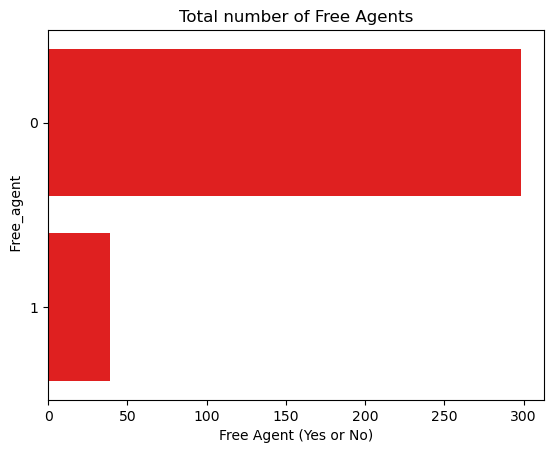

In [9]:
Free_agent = df[' Free_agent']
sns.countplot(y = ' Free_agent', 
              data = df, 
              color = 'red',
              order = Free_agent.value_counts().index)
plt.title('Total number of Free Agents')
plt.xlabel("Free Agent (Yes or No)")
plt.show()

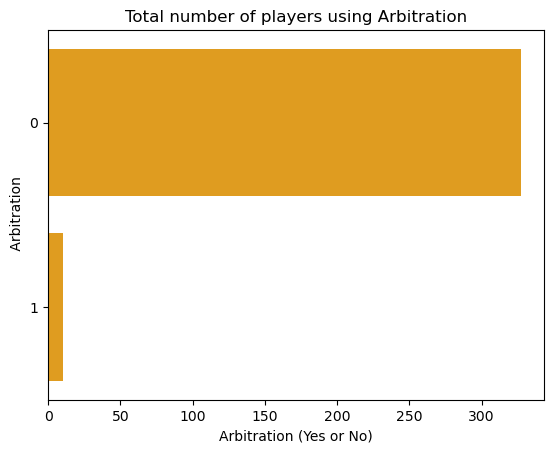

In [10]:
Arbitration = df[' Arbitration']
sns.countplot(y = ' Arbitration', 
              data = df, 
              color = 'orange', 
              order = Arbitration.value_counts().index)
plt.title('Total number of players using Arbitration')
plt.xlabel("Arbitration (Yes or No)")
plt.show()

As can be seen by the previous two bar charts, the proportion of players in the league under free agency is small and the proportion of players in the league that proceeded with arbitration is even smaller.

## Two-Variable Visualisation:

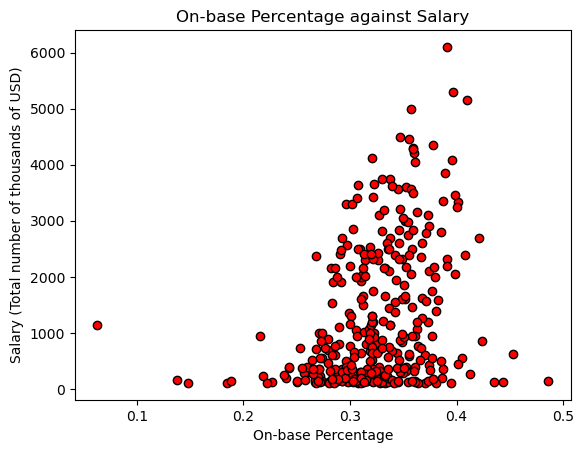

In [11]:
Salary = df['Salary']
On_base_percentage = df[' On-base_percentage']
plt.scatter(On_base_percentage, Salary, 
            color = 'red', 
            edgecolor = 'black')
plt.title('On-base Percentage against Salary')
plt.xlabel("On-base Percentage")
plt.ylabel("Salary (Total number of thousands of USD)")
plt.show()

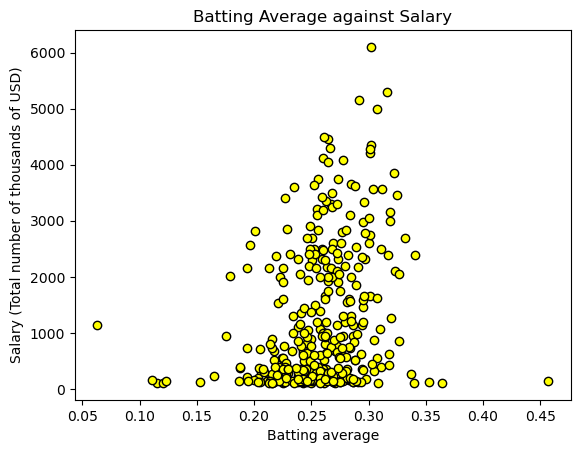

In [12]:
Salary = df['Salary']
Batting_average = df['Batting_average']
plt.scatter(Batting_average, Salary, 
            color = 'yellow', 
            edgecolor = 'black')
plt.title('Batting Average against Salary')
plt.xlabel("Batting average")
plt.ylabel("Salary (Total number of thousands of USD)")
plt.show()

As expected, the two scatterplots of "Batting average against Salary" and "On-base percentage against Salary" are extremely similar. Both plots have a similar clustering of players within a range of approximately 0.15. The main exceptions being a couple extreme outliers on each side of this range. The likely reason for these outliers is the fact that neither of these statistics are influenced by sample size and could be the result of a player only playing in a small number of games and performing way above or way below their usual level in these few games. For this reason, it is extremely important that statistics such as total hits, runs and walks that highlight the quantity of games a player has played in are significantly included in the model.

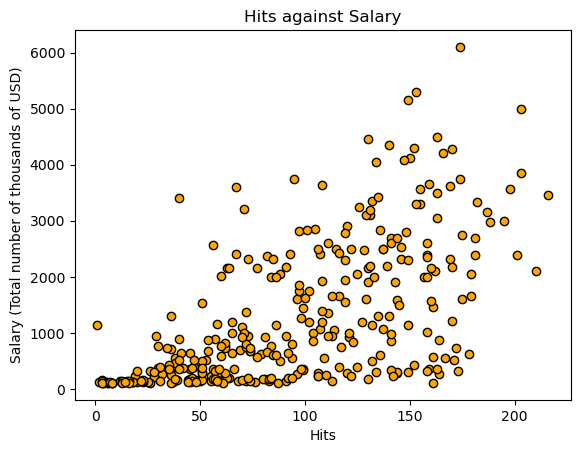

In [13]:
Salary = df['Salary']
Hits = df[' Hits']
plt.scatter(Hits, Salary, 
            color = 'orange', 
            edgecolor = 'black')
plt.title('Hits against Salary')
plt.xlabel("Hits")
plt.ylabel("Salary (Total number of thousands of USD)")
plt.show()

In comparison to the two previous scatterplots the "Hits against Salary" plot has less noticeable outliers whilst still maintaing the clear positive correlation between the variable on the x-axis (Hits in this case) and salary.

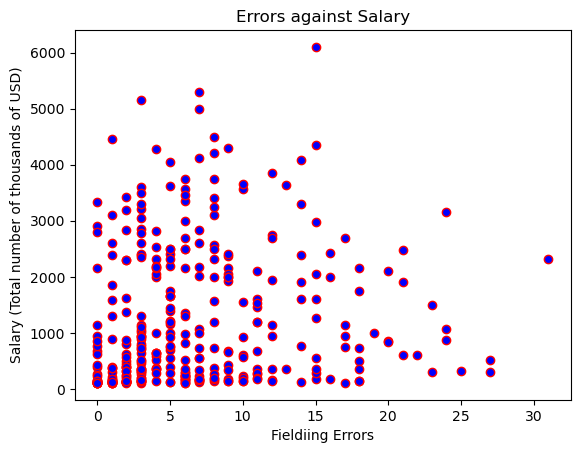

In [14]:
Salary = df['Salary']
Errors = df[' Errors']
plt.scatter(Errors, Salary, 
            color = 'blue',
            edgecolor = 'red')
plt.title('Errors against Salary')
plt.xlabel("Fieldiing Errors")
plt.ylabel("Salary (Total number of thousands of USD)")
plt.show()

There does appear to be a minor negative correlation between fielding errors and salary which suggests fielding is only a relatively insignificant factor in a player's salary/worth. 

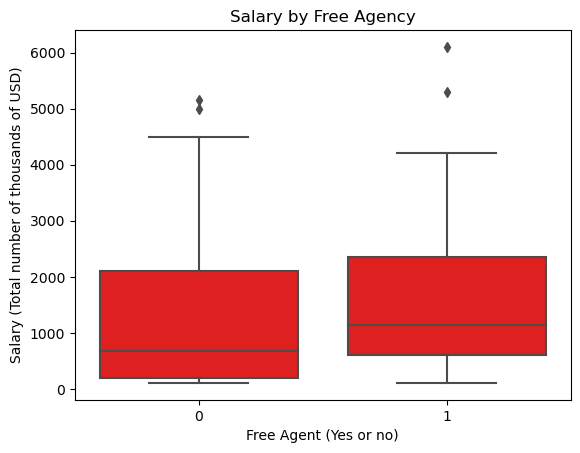

In [15]:
sns.boxplot(df[' Free_agent'], 
            df['Salary'], 
            color = 'red')
plt.title('Salary by Free Agency')
plt.xlabel("Free Agent (Yes or no)")
plt.ylabel("Salary (Total number of thousands of USD)")
plt.show()

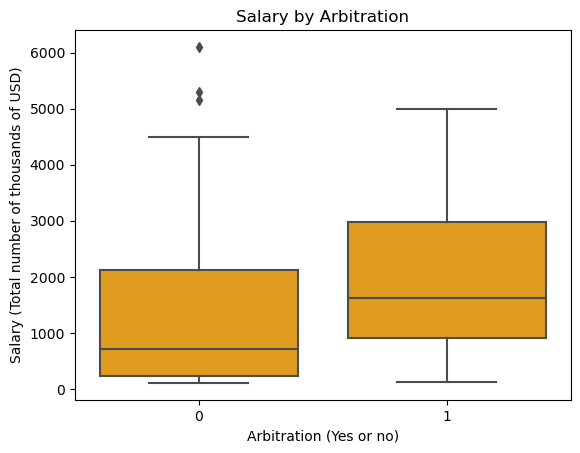

In [16]:
sns.boxplot(df[' Arbitration'], 
            df['Salary'],
           color = 'orange')
plt.title('Salary by Arbitration')
plt.xlabel("Arbitration (Yes or no)")
plt.ylabel("Salary (Total number of thousands of USD)")
plt.show()

Using the box plot of salary by a player using free agency suggests only a minor boost to a player's salary as a free agent. This would make sense as whilst being a free agent, a player is free to explore the market around the league and every club is able to put forward a deal. The argument could be made that the salary of a free agent is the most accurate representation of the player's value during their career as it is a deal signed with minimal restrictions and since it's the first year of the deal the player's current output is most likely to reflect the salary. This is unlike a player nearing the end of a multi-year contract who is being paid based off their expected output from multiple years ago rather than their current expected output. 

The box plot of salary by whether a player is involved in arbitration or not suggests that players with arbitration are generally paid more than those without it. Players eligible for arbitration have been in the league for between 3 and 6 years and the players who go into arbitration are players who are more highly valued and are looking for more than just the minimum MLB wage. This would usually be a group of players who are beginning to go into their strongest years of their career so it is certainly understandable why they are generally paid well in comparison to players ineligible for arbitration. Hence, arbitration and free agency would at least have to be considered for the model. 

## Three-Variable Visualisation

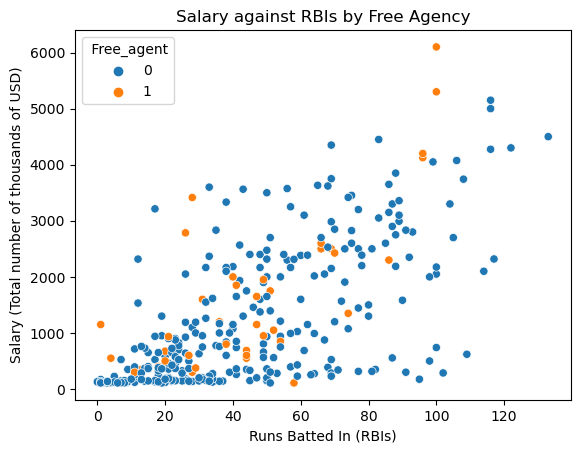

In [17]:
plt.title('Salary against RBIs by Free Agency')
sns.scatterplot(df[' Runs_batted_in'], 
                df['Salary'], 
                hue = df[' Free_agent'],)
plt.xlabel("Runs Batted In (RBIs)")
plt.ylabel("Salary (Total number of thousands of USD)")
plt.show()

As can be seen in the previous scatter plot, a fair proportion of the highest paid players in the league (including the two players with the highest salary) were free agents which suggests free agency is certainly a rule that favours players, rather than the teams and helps players get the most value out of themselves during contract negotiations. However, the free agency pool also includes many veterans and players that have been released from other teams. These players are not demanding the massive contracts that the higher profile free agents are looking for and are rather simply searching for almost any offer that gets them into a team and since these offers are almost always close to the minimum MLB wage it results in the average free agent salary being close to the salary of non-free agents which explains the box plot shown earlier in the report.

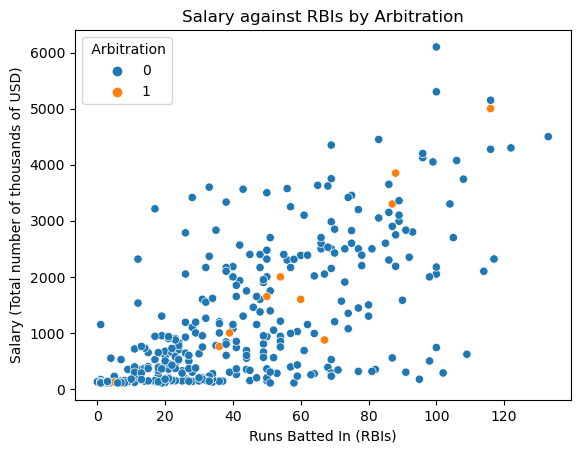

In [18]:
plt.title('Salary against RBIs by Arbitration')
sns.scatterplot(df[' Runs_batted_in'], df['Salary'], hue = df[' Arbitration'])
plt.xlabel("Runs Batted In (RBIs)")
plt.ylabel("Salary (Total number of thousands of USD)")
plt.show()

In [19]:
np.mean(df['Salary'])

1248.5281899109793

Unlike free agency, their is a very limited proportion of players who are in the cluster who are being paid close to the minimum MLB wage and the vast majority of players are being paid a salary around the mean salary of approximately 1.25 million USD. The reason the box plot from earlier in the report suggests players that went through arbitration are generally getting paid more is because of the few that are in the upper echelon of players with the most demand. 

## Summary and Conclusion:
The MLB is a multi-billion-dollar industry that reaches people all over the world with massive franchises all over the United States doing almost anything they can to gain even the slightest competitive advantage over the teams they are in competition with. The significance of statistics and data analysis has gradually increased in prominence over the years and is now an integral part of each individual team and the decisions they make. Identifying the variables or statistics that have the most significant impact on a team winning or losing and using these variables to create a versatile and definitive model when deciding on the value of a player is something each MLB franchise would find exceptionally valuable. 

In Phase 1 of this report, I have begun to identify the variables the teams around the league value most highly when deciding on the salary of a player. I have started by looking through the data set briefly and understanding each of the features it holds and the potential importance each of these features could have in the report. 

Secondly, I’ve undertaken the process of cleaning and pre-processing the data set and the first stage in this is to confirm the features I plan on using in the report and in doing so confirm the variables I don’t have an intention to use and go about dropping these variables entirely from the data set. I concluded that the features “free agency eligibility” and “arbitration eligibility” are not relevant enough to the salary of a player to be worth using in the analysis. “Doubles” and “triples” were the two other variables I decided to remove from the data set as although they are important statistics in baseball they also undoubtedly are almost directly correlated or covered by other statistics such as predominantly runs-batted in and hits. Progressing with the data-cleaning process it was then required that I identify any missing values and then decide on whether I should drop entire rows with missing values or replace the missing values. Fortunately, the data set did not contain any missing values and neither process was required. 

Finally, I have undergone the process of data visualisation and exploration by using a variety of diagrams to begin to understand the correlation between the salary of a player and a number of other different variables of both the numerical and categorical variety. One of the main discoveries from this analysis was the spread of the salary data being not normally distributed and rather having a positive skew as a result of the majority of the data points being mostly clustered around the minimum wage. Due to this, the data will require scaling or a transformation in the second phase of the report. 

Another finding from the data visualisation was abritration generally leading to a higher salary for a player. Free agency also had a similar effect on player salary however the overall impact was less extreme due to a clustering of free agents around the minimum wage. 

Furthermore, players that only played a small number of games are likely to a batting average or on-base percentage that is not reflective of their usual performance before they've had enough opportunities to eventually progress or regress back to their mean. This means that although batting average, hits and on-base percentage all have a similar trend, it is clear that a variety of statistics that are averages and totals must be used when computing a model.


## References:

- Baseball Salaries data set (KEEL). Retrieved March 30, 2023 from https://sci2s.ugr.es/keel/dataset.php?cod=76